In [1]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'}

In [3]:
# url_fb = 'https://finviz.com/quote.ashx?t=FB'
# news_fb_request = requests.get(url_fb, headers=headers).content
# news_fb_content = bs(news_fb_request, 'html.parser')

In [4]:
# news_fb_table = news_fb_content.find_all('table', attrs={'id':'news-table'})

In [5]:
# for i,news in enumerate(news_fb_table):
#     print(news.text)

In [6]:
# news_fb_table_tr = news_fb_table[0].find_all('tr')
# news_fb_table_tr[0].text.split('PM')[0][:-6]

In [7]:
# news_fb_list

In [8]:
# news_des
# news_fb_df = pd.DataFrame(news_fb_list)
# news_fb_df.head()

In [9]:
def news_list_request(news_list, news_table_tr, tag):
    for news in news_table_tr:
        news_tag={}
        news_tag['ticker'] = tag.lower()
        temp = news.find('td').text.split()
        if len(temp) == 1:
            news_tag['time'] = temp[0]
            news_tag['date'] = temp2
        else:
            news_tag['date'] = temp[0]
            temp2 = temp[0]
            news_tag['time'] = temp[1]
        news_tag['description']=news.find('a').text
        news_list.append(news_tag)
    return news_list

In [10]:
def news_headline(tag_list, news_list):
    for tag in tag_list:
        url = 'https://finviz.com/quote.ashx?t='+tag
        news_request = requests.get(url, headers=headers).content
        news_content = bs(news_request, 'html.parser')
        news_table = news_content.find_all('table', attrs={'id':'news-table'})
        news_table_tr = news_table[0].find_all('tr')
        news_list = news_list_request(news_list,news_table_tr, tag)
    return news_list

In [11]:
news_list=[]
news_all_list = news_headline(['FB', 'TSLA'], news_list)
news_df = pd.DataFrame(news_all_list)
news_df.head()

,date,description,ticker,time
0,Apr-26-20,Techs trillion-dollar valuations are about to ...,fb,09:00AM
1,Apr-26-20,Facebook Launches New Free Video Call Feature;...,fb,02:10AM
2,Apr-26-20,Reliance Starts WhatApp-Based Online Portal in...,fb,02:07AM
3,Apr-25-20,Who is Deborah Birx the doctor whose reaction...,fb,04:41PM
4,Apr-25-20,Why its not so crazy that stocks are rising ev...,fb,04:21PM


In [12]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
date           200 non-null object
description    200 non-null object
ticker         200 non-null object
time           200 non-null object
dtypes: object(4)
memory usage: 6.3+ KB


In [13]:
new_words = {
    'crushes': 10,
    'beats': 5,
    'misses': -5,
    'trouble': -10,
    'falls': -100,
}

In [14]:
vader_fb = SentimentIntensityAnalyzer()
vader_fb.lexicon.update(new_words)

In [15]:
news_df = news_df.join(news_df['description'].apply(lambda x:vader_fb.polarity_scores(x)).apply(pd.Series))
news_df.head()

,date,description,ticker,time,neg,neu,pos,compound
0,Apr-26-20,Techs trillion-dollar valuations are about to ...,fb,09:00AM,0.0,1.000,0.000,0.0000
1,Apr-26-20,Facebook Launches New Free Video Call Feature;...,fb,02:10AM,0.0,0.621,0.379,0.6705
2,Apr-26-20,Reliance Starts WhatApp-Based Online Portal in...,fb,02:07AM,0.0,1.000,0.000,0.0000
3,Apr-25-20,Who is Deborah Birx the doctor whose reaction...,fb,04:41PM,0.0,1.000,0.000,0.0000
4,Apr-25-20,Why its not so crazy that stocks are rising ev...,fb,04:21PM,0.0,0.869,0.131,0.3749


In [16]:
news_df['date'] = pd.to_datetime(news_df['date']).dt.date
news_df.head()

,date,description,ticker,time,neg,neu,pos,compound
0,2020-04-26,Techs trillion-dollar valuations are about to ...,fb,09:00AM,0.0,1.000,0.000,0.0000
1,2020-04-26,Facebook Launches New Free Video Call Feature;...,fb,02:10AM,0.0,0.621,0.379,0.6705
2,2020-04-26,Reliance Starts WhatApp-Based Online Portal in...,fb,02:07AM,0.0,1.000,0.000,0.0000
3,2020-04-25,Who is Deborah Birx the doctor whose reaction...,fb,04:41PM,0.0,1.000,0.000,0.0000
4,2020-04-25,Why its not so crazy that stocks are rising ev...,fb,04:21PM,0.0,0.869,0.131,0.3749


In [17]:
news_grp = news_df.groupby(['date', 'ticker']).mean()
news_grp = news_grp.unstack(level='ticker')
news_grp

neg                 neu                 pos            \
ticker            fb      tsla        fb      tsla        fb      tsla   
date                                                                     
2020-04-15       NaN  0.039192       NaN  0.914846       NaN  0.045962   
2020-04-16       NaN  0.090900       NaN  0.797400       NaN  0.111600   
2020-04-17       NaN  0.016778       NaN  0.937778       NaN  0.045556   
2020-04-18       NaN  0.000000       NaN  1.000000       NaN  0.000000   
2020-04-19       NaN  0.000000       NaN  0.815000       NaN  0.185000   
2020-04-20       NaN  0.000000       NaN  0.861167       NaN  0.138833   
2020-04-21  0.061421  0.038333  0.860684  0.926167  0.077895  0.035500   
2020-04-22  0.025469  0.046000  0.887313  0.925417  0.087219  0.028583   
2020-04-23  0.000000  0.062900  0.746200  0.862600  0.253800  0.074500   
2020-04-24  0.055889  0.036818  0.856889  0.807091  0.087259  0.156091   
2020-04-25  0.078000  0.000000  0.782778  1.000000  0.139222  0.000000   
2020-04-26  0.000000  0.037600  0.873667  0.925000  0.126333  0.037400   

            compound            
ticker            fb      tsla  
date                            
2020-04-15       NaN  0.011969  
2020-04-16       NaN -0.017080  
2020-04-17       NaN  0.052511  
2020-04-18       NaN  0.000000  
2020-04-19       NaN  0.361200  
2020-04-20       NaN  0.135267  
2020-04-21  0.011384  0.016150  
2020-04-22  0.086719 -0.041825  
2020-04-23  0.379110 -0.013400  
2020-04-24  0.042848  0.163564  
2020-04-25  0.178756  0.000000  
2020-04-26  0.223500 -0.050740

In [18]:
news_grp.fillna(0.0, inplace=True)
news_grp.head()

neg            neu            pos           compound          
ticker       fb      tsla   fb      tsla   fb      tsla       fb      tsla
date                                                                      
2020-04-15  0.0  0.039192  0.0  0.914846  0.0  0.045962      0.0  0.011969
2020-04-16  0.0  0.090900  0.0  0.797400  0.0  0.111600      0.0 -0.017080
2020-04-17  0.0  0.016778  0.0  0.937778  0.0  0.045556      0.0  0.052511
2020-04-18  0.0  0.000000  0.0  1.000000  0.0  0.000000      0.0  0.000000
2020-04-19  0.0  0.000000  0.0  0.815000  0.0  0.185000      0.0  0.361200

In [19]:
news_grp

neg                 neu                 pos            \
ticker            fb      tsla        fb      tsla        fb      tsla   
date                                                                     
2020-04-15  0.000000  0.039192  0.000000  0.914846  0.000000  0.045962   
2020-04-16  0.000000  0.090900  0.000000  0.797400  0.000000  0.111600   
2020-04-17  0.000000  0.016778  0.000000  0.937778  0.000000  0.045556   
2020-04-18  0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
2020-04-19  0.000000  0.000000  0.000000  0.815000  0.000000  0.185000   
2020-04-20  0.000000  0.000000  0.000000  0.861167  0.000000  0.138833   
2020-04-21  0.061421  0.038333  0.860684  0.926167  0.077895  0.035500   
2020-04-22  0.025469  0.046000  0.887313  0.925417  0.087219  0.028583   
2020-04-23  0.000000  0.062900  0.746200  0.862600  0.253800  0.074500   
2020-04-24  0.055889  0.036818  0.856889  0.807091  0.087259  0.156091   
2020-04-25  0.078000  0.000000  0.782778  1.000000  0.139222  0.000000   
2020-04-26  0.000000  0.037600  0.873667  0.925000  0.126333  0.037400   

            compound            
ticker            fb      tsla  
date                            
2020-04-15  0.000000  0.011969  
2020-04-16  0.000000 -0.017080  
2020-04-17  0.000000  0.052511  
2020-04-18  0.000000  0.000000  
2020-04-19  0.000000  0.361200  
2020-04-20  0.000000  0.135267  
2020-04-21  0.011384  0.016150  
2020-04-22  0.086719 -0.041825  
2020-04-23  0.379110 -0.013400  
2020-04-24  0.042848  0.163564  
2020-04-25  0.178756  0.000000  
2020-04-26  0.223500 -0.050740

In [20]:
news_grp=news_grp.xs('compound', axis=1)
news_grp.head()

ticker,fb,tsla
date,,
2020-04-15,0.0,0.011969
2020-04-16,0.0,-0.017080
2020-04-17,0.0,0.052511
2020-04-18,0.0,0.000000
2020-04-19,0.0,0.361200


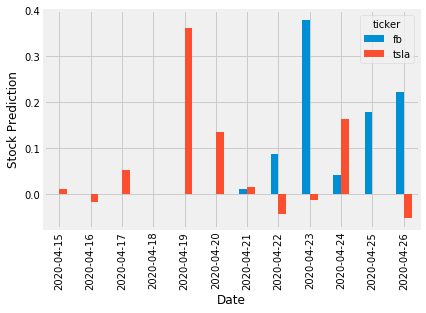

In [22]:
plt.style.use("fivethirtyeight")
%matplotlib inline
news_grp.plot.bar()
plt.xlabel('Date')
plt.ylabel('Stock Prediction')
plt.show()

In [23]:
news_grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2020-04-15 to 2020-04-26
Data columns (total 2 columns):
fb      12 non-null float64
tsla    12 non-null float64
dtypes: float64(2)
memory usage: 288.0+ bytes


In [24]:
news_df.head()

,date,description,ticker,time,neg,neu,pos,compound
0,2020-04-26,Techs trillion-dollar valuations are about to ...,fb,09:00AM,0.0,1.000,0.000,0.0000
1,2020-04-26,Facebook Launches New Free Video Call Feature;...,fb,02:10AM,0.0,0.621,0.379,0.6705
2,2020-04-26,Reliance Starts WhatApp-Based Online Portal in...,fb,02:07AM,0.0,1.000,0.000,0.0000
3,2020-04-25,Who is Deborah Birx the doctor whose reaction...,fb,04:41PM,0.0,1.000,0.000,0.0000
4,2020-04-25,Why its not so crazy that stocks are rising ev...,fb,04:21PM,0.0,0.869,0.131,0.3749


In [35]:
news_grp_df1 = news_df.set_index(['ticker', 'date'])
news_grp_df1.head()

description     time  \
ticker date                                                                     
fb     2020-04-26  Techs trillion-dollar valuations are about to ...  09:00AM   
       2020-04-26  Facebook Launches New Free Video Call Feature;...  02:10AM   
       2020-04-26  Reliance Starts WhatApp-Based Online Portal in...  02:07AM   
       2020-04-25  Who is Deborah Birx  the doctor whose reaction...  04:41PM   
       2020-04-25  Why its not so crazy that stocks are rising ev...  04:21PM   

                   neg    neu    pos  compound  
ticker date                                     
fb     2020-04-26  0.0  1.000  0.000    0.0000  
       2020-04-26  0.0  0.621  0.379    0.6705  
       2020-04-26  0.0  1.000  0.000    0.0000  
       2020-04-25  0.0  1.000  0.000    0.0000  
       2020-04-25  0.0  0.869  0.131    0.3749

In [36]:
news_fb_df = news_grp_df1.xs('fb', axis=0)
news_fb_df

,description,time,neg,neu,pos,compound
date,,,,,,
2020-04-26,Techs trillion-dollar valuations are about to ...,09:00AM,0.000,1.000,0.000,0.0000
2020-04-26,Facebook Launches New Free Video Call Feature;...,02:10AM,0.000,0.621,0.379,0.6705
2020-04-26,Reliance Starts WhatApp-Based Online Portal in...,02:07AM,0.000,1.000,0.000,0.0000
2020-04-25,Who is Deborah Birx the doctor whose reaction...,04:41PM,0.000,1.000,0.000,0.0000
2020-04-25,Why its not so crazy that stocks are rising ev...,04:21PM,0.000,0.869,0.131,0.3749
2020-04-25,Large Facebook Option Trader Betting On Earnin...,04:08PM,0.000,1.000,0.000,0.0000
2020-04-25,Companies reveal their plans for what work wil...,11:40AM,0.000,0.857,0.143,0.3612
2020-04-25,"Is There An Opportunity With Facebook, Inc.'s ...",09:45AM,0.000,0.763,0.237,0.4215
2020-04-25,Fight the quarantine 15 with free workouts fro...,09:32AM,0.107,0.535,0.358,0.7269


In [39]:
news_fb_df.time = pd.to_datetime(news_fb_df.time).dt.time
news_fb_df.sort_index()

C:\Users\samya\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,description,time,neg,neu,pos,compound
date,,,,,,
2020-04-21,How Big Tech is stepping up to help with Covid...,10:04:00,0.000,0.787,0.213,0.4019
2020-04-21,Facebook invests $5.7 billion in Reliance unit...,21:47:00,0.000,1.000,0.000,0.0000
2020-04-21,Facebook takes $5.7 billion stake in India's J...,21:47:00,0.000,1.000,0.000,0.0000
2020-04-21,Facebook invests $5.7 billion in Reliance unit...,21:17:00,0.000,0.909,0.091,0.0258
2020-04-21,Facebook invests $5.7 billion in India's Relia...,21:15:00,0.000,1.000,0.000,0.0000
2020-04-21,Far-Right Social Media Helps Stir Protests Ove...,18:49:00,0.181,0.571,0.248,0.1779
2020-04-21,Snap Stock Jumps As Quarterly Results Smash Es...,17:03:00,0.000,1.000,0.000,0.0000
2020-04-21,Snapchat Says App Usage Accelerating With Peop...,16:57:00,0.000,1.000,0.000,0.0000
2020-04-21,Dow sinks 630 points to end at 2-week low as t...,16:28:00,0.110,0.890,0.000,-0.2732


In [40]:
date_list = news_fb_df.index.unique()
date_list

DatetimeIndex(['2020-04-26', '2020-04-25', '2020-04-24', '2020-04-23',
               '2020-04-22', '2020-04-21'],
              dtype='datetime64[ns]', name='date', freq=None)

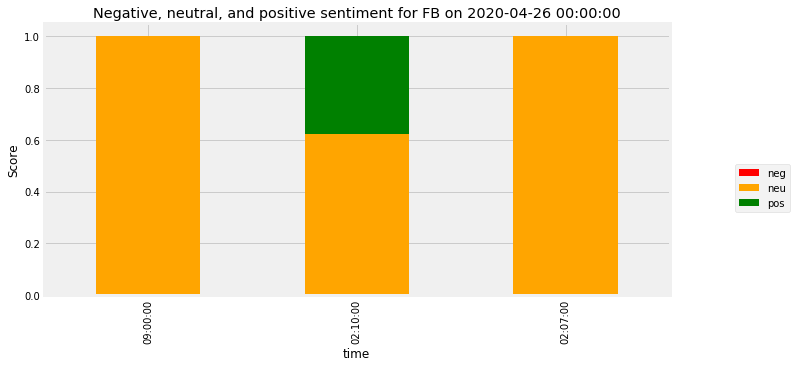

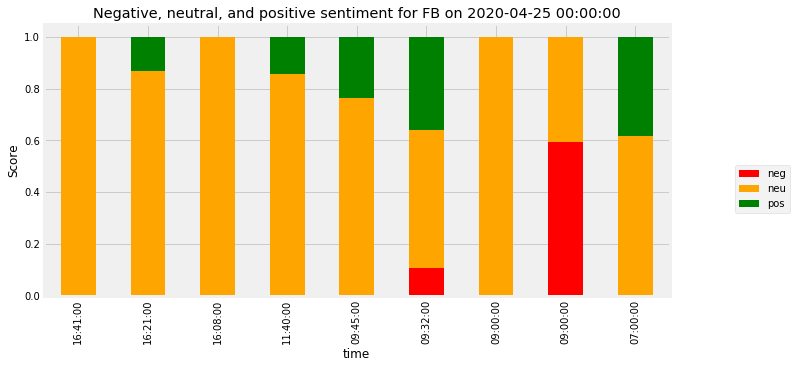

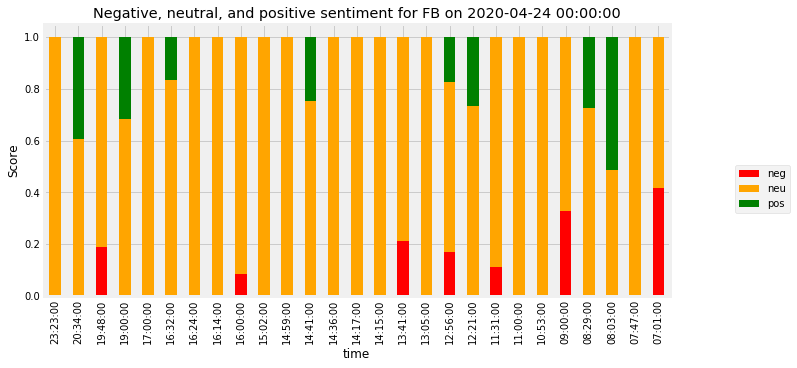

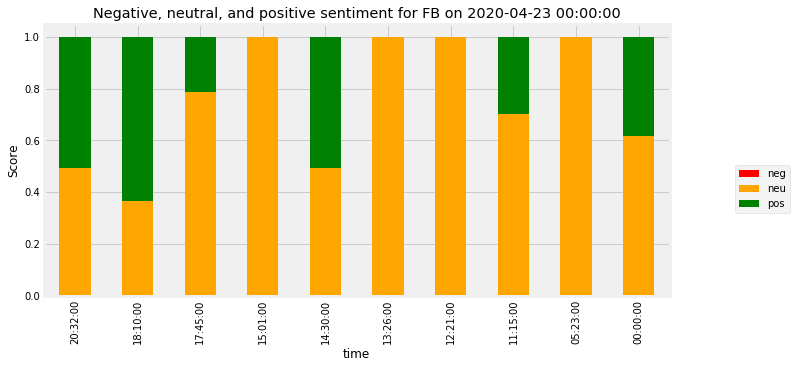

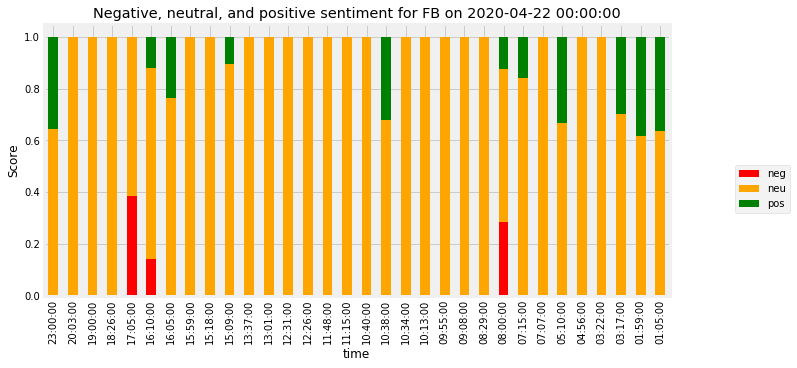

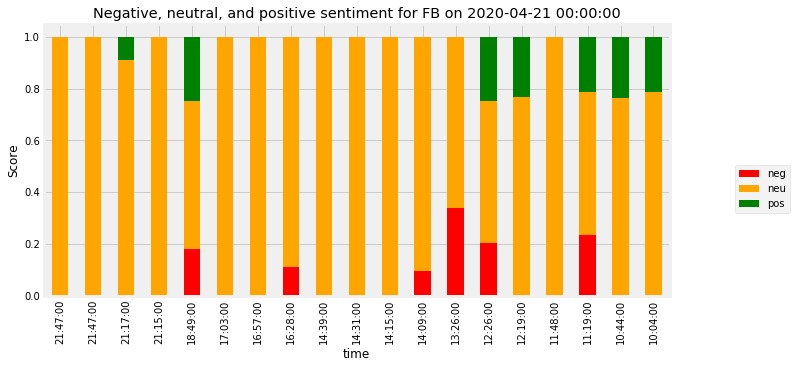

In [47]:
for day in date_list:
    news_fb = news_fb_df.loc[day].copy()
    news_fb.set_index('time', inplace=True)
    news_fb.sort_index()
    title = "Negative, neutral, and positive sentiment for FB on "+str(day)
    colors = ["red","orange", "green"]
    news_fb.drop(['description', 'compound'], axis=1, inplace=True)
    news_fb.plot.bar(stacked=True, title=title, color=colors, figsize=(10,5)).legend(bbox_to_anchor=[1.2,0.5])
    plt.ylabel('Score')
    